In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [112]:
df1 = pd.read_csv('Literacy rate youth.csv')


In [113]:
df2 = pd.read_csv('hdi.csv',skiprows=5,encoding='latin-1')

In [114]:
df3 = pd.read_csv('expenditures.csv')

In [115]:
df1.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2015,Female,15-24 year olds,Percent,46.105990
1,Afghanistan,2015,Male,15-24 year olds,Percent,69.420520
2,Afghanistan,2015,All genders,15-24 year olds,Percent,58.154900
3,Afghanistan,2011,All genders,15-24 year olds,Percent,46.990051
4,Afghanistan,2011,Male,15-24 year olds,Percent,61.879069


In [116]:
df1 = df1.rename(columns={'Reference Area': 'Country'})
df1 = df1.rename(columns={'Observation Value': 'Literacy Rate'})
df1.head()

,Country,Time Period,Sex,Age group,Units of measurement,Literacy Rate
0,Afghanistan,2015,Female,15-24 year olds,Percent,46.105990
1,Afghanistan,2015,Male,15-24 year olds,Percent,69.420520
2,Afghanistan,2015,All genders,15-24 year olds,Percent,58.154900
3,Afghanistan,2011,All genders,15-24 year olds,Percent,46.990051
4,Afghanistan,2011,Male,15-24 year olds,Percent,61.879069


In [117]:
#sns.heatmap(df1.corr())

In [118]:
df2.head()

df2=df2.dropna(how='all', axis='columns')
df2['Country'] = df2['Country'].str.strip()
df2.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,69,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.590,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.740,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [119]:

df3['Country'] = df3['Country'].str.strip()

df3 = df3.rename(columns={'TIME': 'Time Period'})
df3 = df3.rename(columns={'Value': '% of GDP exp Education'})
#df3.head()

In [120]:
df2.columns

Index(['HDI Rank', 'Country', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [121]:
for i in range(1990,2020):

    indexNames = df2[(df2[str(i)] == '...') | (df2[str(i)] == '..')].index 
    df2.drop(indexNames , inplace=True)
    df2[str(i)] = df2[str(i)].astype(float)

df2.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,69,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.590,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.740,0.743,0.745,0.746,0.748
6,46,Argentina,0.718,0.725,0.730,0.735,0.739,0.741,0.748,0.757,...,0.829,0.835,0.834,0.835,0.836,0.840,0.839,0.843,0.842,0.845
7,81,Armenia,0.654,0.648,0.618,0.617,0.621,0.627,0.634,0.645,...,0.747,0.751,0.756,0.762,0.764,0.768,0.766,0.769,0.771,0.776


In [122]:
years = df2.drop(columns={'HDI Rank'})
years = years.melt(id_vars=['Country'], var_name='Year', value_name='HDI')
years['Country'] = years['Country'].str.strip()
years

,Country,Year,HDI
0,Afghanistan,1990,0.302
1,Albania,1990,0.650
2,Algeria,1990,0.572
3,Argentina,1990,0.718
4,Armenia,1990,0.654
5,Australia,1990,0.871
6,Austria,1990,0.803
7,Bahrain,1990,0.749
8,Bangladesh,1990,0.394
9,Barbados,1990,0.732


In [69]:
df1.corr()

,Time Period,Literacy Rate
Time Period,1.000000,0.250054
Literacy Rate,0.250054,1.000000


In [70]:
df1.describe()

,Time Period,Literacy Rate
count,4010.000000,4010.000000
mean,2002.961596,86.778156
std,10.318646,16.830429
min,1975.000000,6.664060
25%,1996.000000,78.474035
50%,2005.000000,94.574940
75%,2012.000000,98.883608
max,2015.000000,100.000000


In [123]:
df1['Literacy Rate'].dtype

dtype('float64')

In [124]:
#df1[df1.Sex=='All genders'].head(10)
df11=df1[df1.Sex=='All genders']

df11.head()
#df11.groupby('Time Period').size()
#z.head()

,Country,Time Period,Sex,Age group,Units of measurement,Literacy Rate
2,Afghanistan,2015,All genders,15-24 year olds,Percent,58.154900
3,Afghanistan,2011,All genders,15-24 year olds,Percent,46.990051
8,Afghanistan,1979,All genders,15-24 year olds,Percent,30.066350
11,Albania,2015,All genders,15-24 year olds,Percent,99.029200
12,Albania,2012,All genders,15-24 year olds,Percent,99.231400


In [125]:
lit_2015 = df11[df11['Time Period'] == 2015]
lit_2015.head()

lit_2000 = df11[df11['Time Period'] == 2000]
print(len(lit_2015))

176


In [126]:
top = lit_2015.sort_values(by=['Literacy Rate'], ascending=True).head(20)['Country']
top

3000                       Niger
385     Central African Republic
3525                 South Sudan
842                       Guinea
1277                        Mali
517                Côte d'Ivoire
297                 Burkina Faso
167                        Benin
396                         Chad
1164                     Liberia
2                    Afghanistan
1332                  Mauritania
1220                  Madagascar
3139            Papua New Guinea
3448                Sierra Leone
728                     Ethiopia
3403                     Senegal
3587                       Sudan
2224                 MDG_Oceania
3013                     Nigeria
Name: Country, dtype: object

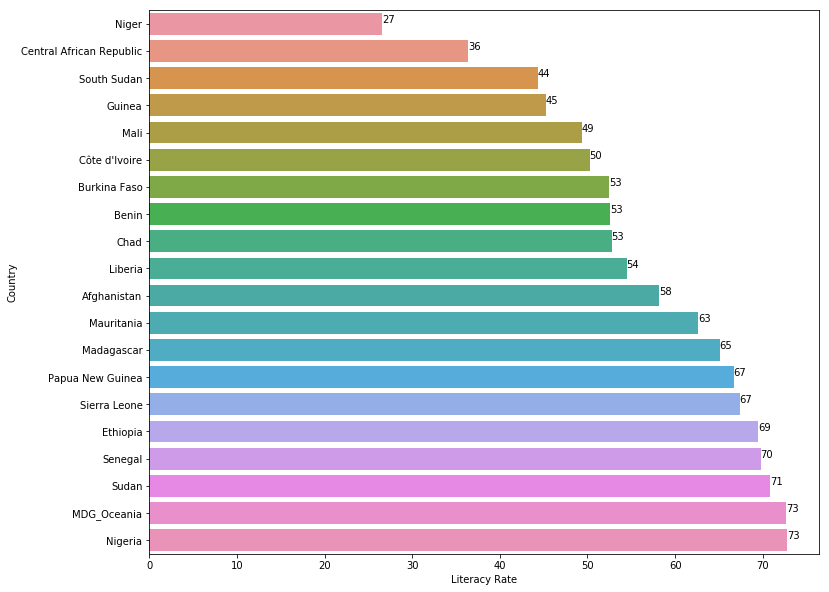

In [127]:
import matplotlib.pyplot as plt
top_20 = lit_2015.sort_values(by=['Literacy Rate'], ascending=True).head(20)
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Literacy Rate'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Literacy Rate'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [76]:
figure = px.choropleth(lit_2000,locations='Country', locationmode='country names',
color='Literacy Rate', hover_name='Country', color_continuous_scale='tealgrn', range_color=[50,100]
,title='Literacy rates 2000')

figure1 = px.choropleth(lit_2015,locations='Country', locationmode='country names',
color='Literacy Rate', hover_name='Country', color_continuous_scale='tealgrn', range_color=[50,100]
,title='Literacy rates 2015')
figure.show()
figure1.show()

In [77]:
df11_female=df1[df1.Sex=='Female']
lit_2015f = df11_female[df11_female['Time Period'] == 2015]

figure3 = px.choropleth(lit_2015f,locations='Country', locationmode='country names',
color='Literacy Rate', hover_name='Country', color_continuous_scale='tealgrn', range_color=[50,100]
,title='Literacy rates 2015')
figure3.show()

In [128]:
df11 = df11.rename(columns={'Time Period' : 'Year'})
df11.columns

Index(['Country', 'Year', 'Sex', 'Age group', 'Units of measurement',
       'Literacy Rate'],
      dtype='object')

In [129]:
df11.dtypes

Country                  object
Year                      int64
Sex                      object
Age group                object
Units of measurement     object
Literacy Rate           float64
dtype: object

In [130]:
years.dtypes

Country     object
Year        object
HDI        float64
dtype: object

In [131]:
years['Year'] = years['Year'].astype(int)

In [132]:
new_melt1_2 = pd.merge(df11,years,on=['Country','Year'],how='inner')
new_melt1_2

,Country,Year,Sex,Age group,Units of measurement,Literacy Rate,HDI
0,Afghanistan,2015,All genders,15-24 year olds,Percent,58.154900,0.500
1,Afghanistan,2011,All genders,15-24 year olds,Percent,46.990051,0.477
2,Albania,2015,All genders,15-24 year olds,Percent,99.029200,0.788
3,Albania,2012,All genders,15-24 year olds,Percent,99.231400,0.775
4,Albania,2011,All genders,15-24 year olds,Percent,98.791190,0.764
5,Albania,2008,All genders,15-24 year olds,Percent,98.831210,0.728
6,Albania,2001,All genders,15-24 year olds,Percent,99.435150,0.678
7,Algeria,2015,All genders,15-24 year olds,Percent,96.752600,0.740
8,Algeria,2008,All genders,15-24 year olds,Percent,93.767330,0.702
9,Algeria,2006,All genders,15-24 year olds,Percent,91.779640,0.690


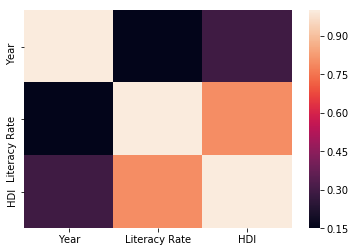

In [83]:
sns.heatmap(new_melt1_2.corr())

In [84]:
print(df3.head())

       SDG_IND                                          Indicator LOCATION  \
0  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
1  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
2  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
3  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
4  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   

  Country  Time Period  Time  % of GDP exp Education Flag Codes Flags  
0   Japan         1981  1981                16.12549        NaN   NaN  
1   Japan         1982  1982                15.67715        NaN   NaN  
2   Japan         1983  1983                14.88605        NaN   NaN  
3   Japan         1987  1987                18.05424        NaN   NaN  
4   Japan         1988  1988                17.79666        NaN   NaN  


In [85]:
df11.head()

,Country,Year,Sex,Age group,Units of measurement,Literacy Rate
2,Afghanistan,2015,All genders,15-24 year olds,Percent,58.154900
3,Afghanistan,2011,All genders,15-24 year olds,Percent,46.990051
8,Afghanistan,1979,All genders,15-24 year olds,Percent,30.066350
11,Albania,2015,All genders,15-24 year olds,Percent,99.029200
12,Albania,2012,All genders,15-24 year olds,Percent,99.231400


In [86]:

df3=df3.rename(columns={'Time Period':'Year'})
df3.head()

,SDG_IND,Indicator,LOCATION,Country,Year,Time,% of GDP exp Education,Flag Codes,Flags
0,XGOVEXP_IMF,Expenditure on education as a percentage of to...,JPN,Japan,1981,1981,16.12549,NaN,NaN
1,XGOVEXP_IMF,Expenditure on education as a percentage of to...,JPN,Japan,1982,1982,15.67715,NaN,NaN
2,XGOVEXP_IMF,Expenditure on education as a percentage of to...,JPN,Japan,1983,1983,14.88605,NaN,NaN
3,XGOVEXP_IMF,Expenditure on education as a percentage of to...,JPN,Japan,1987,1987,18.05424,NaN,NaN
4,XGOVEXP_IMF,Expenditure on education as a percentage of to...,JPN,Japan,1988,1988,17.79666,NaN,NaN


In [87]:
merge_exp_lit  = pd.merge(df3,df11,on=['Country','Year'],how='inner')
print(merge_exp_lit)

         SDG_IND                                          Indicator LOCATION  \
0    XGOVEXP_IMF  Expenditure on education as a percentage of to...      EGY   
1    XGOVEXP_IMF  Expenditure on education as a percentage of to...      EGY   
2    XGOVEXP_IMF  Expenditure on education as a percentage of to...      MAR   
3    XGOVEXP_IMF  Expenditure on education as a percentage of to...      MAR   
4    XGOVEXP_IMF  Expenditure on education as a percentage of to...      CHL   
5    XGOVEXP_IMF  Expenditure on education as a percentage of to...      CHL   
6    XGOVEXP_IMF  Expenditure on education as a percentage of to...      CHL   
7    XGOVEXP_IMF  Expenditure on education as a percentage of to...      CHL   
8    XGOVEXP_IMF  Expenditure on education as a percentage of to...      CHL   
9    XGOVEXP_IMF  Expenditure on education as a percentage of to...      CHL   
10   XGOVEXP_IMF  Expenditure on education as a percentage of to...      IND   
11   XGOVEXP_IMF  Expenditure on educati

In [88]:
exp_lit_2015 = merge_exp_lit[merge_exp_lit['Year'] == 2015]

exp_lit_2000 = merge_exp_lit[merge_exp_lit['Year'] == 2000]

In [89]:
print(exp_lit_2015.head())

        SDG_IND                                          Indicator LOCATION  \
9   XGOVEXP_IMF  Expenditure on education as a percentage of to...      CHL   
20  XGOVEXP_IMF  Expenditure on education as a percentage of to...      TGO   
24  XGOVEXP_IMF  Expenditure on education as a percentage of to...      GMB   
28  XGOVEXP_IMF  Expenditure on education as a percentage of to...      MLI   
31  XGOVEXP_IMF  Expenditure on education as a percentage of to...      BLZ   

   Country  Year  Time  % of GDP exp Education Flag Codes Flags          Sex  \
9    Chile  2015  2015                19.59405        NaN   NaN  All genders   
20    Togo  2015  2015                16.66499        NaN   NaN  All genders   
24  Gambia  2015  2015                11.03293        NaN   NaN  All genders   
28    Mali  2015  2015                18.15549        NaN   NaN  All genders   
31  Belize  2015  2015                21.61292        NaN   NaN  All genders   

          Age group Units of measurement  Li

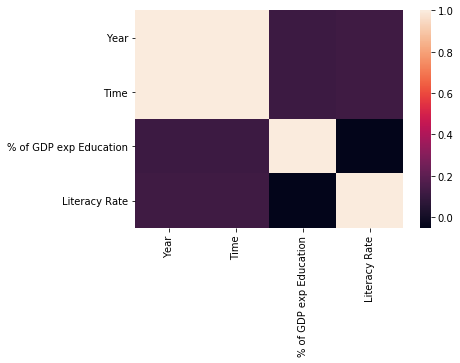

In [90]:
sns.heatmap( merge_exp_lit.corr())

<Figure size 1440x720 with 0 Axes>

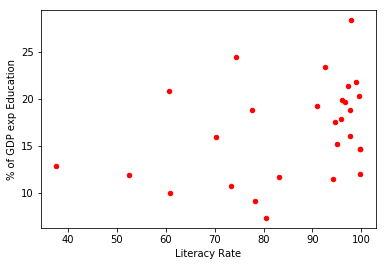

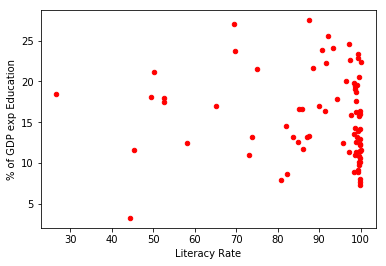

In [91]:
plt.figure(figsize=(20,10))
exp_lit_2000.plot(kind='scatter',x='Literacy Rate',y='% of GDP exp Education',color='red')
exp_lit_2015.plot(kind='scatter',x='Literacy Rate',y='% of GDP exp Education',color='red')


In [92]:
years.dtypes

Country     object
Year         int32
HDI        float64
dtype: object

In [93]:
print(years.head())


       Country  Year    HDI
0  Afghanistan  1990  0.302
1      Albania  1990  0.650
2      Algeria  1990  0.572
3    Argentina  1990  0.718
4      Armenia  1990  0.654


In [94]:
merge_exp_hdi  = pd.merge(df3,years,on=['Country','Year'],how='inner')
#hdivsexp2015 = merge_exp_hdi[merge_exp_hdi['Time Period'] == 2015]

print(merge_exp_hdi.head())



       SDG_IND                                          Indicator LOCATION  \
0  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
1  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
2  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
3  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   
4  XGOVEXP_IMF  Expenditure on education as a percentage of to...      JPN   

  Country  Year  Time  % of GDP exp Education Flag Codes Flags    HDI  
0   Japan  1993  1993                11.11497        NaN   NaN  0.831  
1   Japan  1994  1994                11.10642        NaN   NaN  0.837  
2   Japan  1995  1995                10.38097        NaN   NaN  0.842  
3   Japan  1998  1998                 9.96590        NaN   NaN  0.849  
4   Japan  1999  1999                 8.74185        NaN   NaN  0.852  


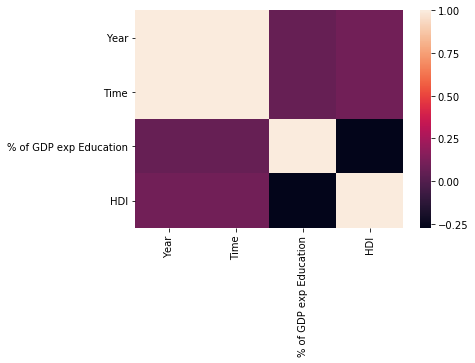

In [95]:
sns.heatmap(merge_exp_hdi.corr())


In [96]:
#print(hdivsexp2015['2015'].dtypes)
z = sns.regplot(x=hdivsexp2015['% of GDP exp Education'],y=hdivsexp2015['2015'])

NameError: name 'hdivsexp2015' is not defined

In [133]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

copy = df1.copy()
copy=copy.drop(columns=['Age group','Sex','Time Period','Units of measurement'])
#copy.head()
X=copy



from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Country'] = le.fit_transform(X['Country'])
#X['Sex'] = le.fit_transform(X['Sex'])
X.head()

# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1,11),wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()




#print(X)
#kmeans = KMeans(n_clusters=4, max_iter=50)
#kmeans.fit(merged_inner)

#rfm['Cluster_Id'] = kmeans.labels_
#rfm.head()

,Country,Literacy Rate
0,0,46.105990
1,0,69.420520
2,0,58.154900
3,0,46.990051
4,0,61.879069


In [134]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,Country,Literacy Rate
0,0.0,0.422580
1,0.0,0.672372
2,0.0,0.551672
3,0.0,0.432052
4,0.0,0.591573


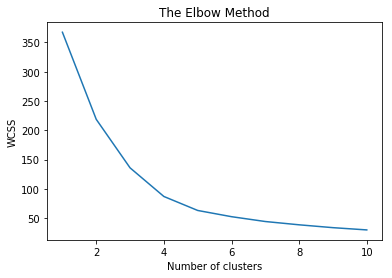

In [135]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [136]:
kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)
#len(kmeans.labels_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [137]:
#X['cluster'] = kmeans.labels_
y_kmeans = kmeans.fit_predict(X)
a = X[["Country"]]
b = X[["Literacy Rate"]]
#print(a[y_kmeans==0])

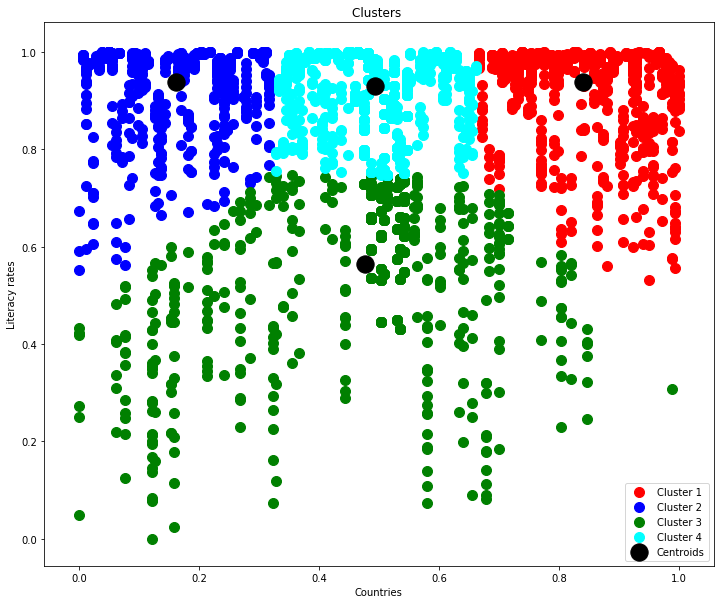

In [138]:
plt.figure(figsize=(12,10))
plt.scatter(a[y_kmeans == 0], b[y_kmeans == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(a[y_kmeans == 1], b[y_kmeans == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(a[y_kmeans == 2], b[y_kmeans == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(a[y_kmeans == 3], b[y_kmeans == 3], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters ')
plt.xlabel('Countries')
plt.ylabel('Literacy rates')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

copy1 = new_melt1_2

#copy1.head()
copy1=copy1.drop(columns={'Country','Units of measurement','Sex','Age group','Year'})
#copy.head()
X=copy1

cols = X.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X['Country'] = le.fit_transform(X['Country'])
# #X['Sex'] = le.fit_transform(X['Sex'])
# X.head()


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
a = X[["HDI"]]
b = X[["Literacy Rate"]]

plt.figure(figsize=(8,6))
plt.scatter(a[y_kmeans == 0], b[y_kmeans == 0], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(a[y_kmeans == 1], b[y_kmeans == 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(a[y_kmeans == 2], b[y_kmeans == 2], s = 100, c = 'green', label = 'Cluster 2')
#plt.scatter(a[y_kmeans == 3], b[y_kmeans == 3], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters ')
plt.xlabel('HDI')
plt.ylabel('Literacy rates')
plt.legend()
plt.show()

In [ ]:
new_melt1_2_copy = new_melt1_2.copy()
new_melt1_2_copy["Clusters"] = kmeans.predict(X)
#new_melt1_2_copy

In [ ]:
print("Few Countries belonging to Cluster 0: ",list(new_melt1_2_copy[new_melt1_2_copy["Clusters"]==0].head(30).Country.unique()))
print("Few Countries belonging to Cluster 1: ",list(new_melt1_2_copy[new_melt1_2_copy["Clusters"]==1].head(30).Country.unique()))
print("Few Countries belonging to Cluster 2: ",list(new_melt1_2_copy[new_melt1_2_copy["Clusters"]==2].head(30).Country.unique()))

In [ ]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)

In [ ]:
y_hc

In [ ]:
# a = X[["HDI"]]
# b = X[["Literacy Rate"]]

plt.figure(figsize=(12,8))
plt.scatter(X[y_hc == 0], X[y_hc == 0], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1], X[y_hc == 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2], X[y_hc == 2], s = 100, c = 'green', label = 'Cluster 2')
#plt.scatter(X[y_hc == 3], X[y_hc == 3], s = 100, c = 'cyan', label = 'Cluster 3')

plt.legend()
plt.show()

In [ ]:
####Sub-saharan region###
df_africa = new_melt1_2[new_melt1_2['Country']=='MDG_Sub-Saharan Africa']
#print(df1_sub)

df_africa


#plt.figure(figsize=(15, 10))
#a = sns.barplot(exp_lit_2000['Country'], exp_lit_2000['Literacy Rate'])

In [ ]:
# columns= ["Country", "Year", "Status"]
# for feature in columns:
#     le= LabelEncoder()
#     df[feature]= le.fit_transform(df[feature])
#     df[feature].astype("int64")

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_rf = new_melt1_2.copy()
df_rf = df_rf.drop(columns={'Units of measurement','Sex','Age group'})
y=df_rf['Literacy Rate']
columns= ["Country"]
for feature in columns:
    le= LabelEncoder()
    df_rf[feature]= le.fit_transform(df_rf[feature])
    df_rf[feature].astype("int64")
columns= ['HDI']
for feature in columns:
    sc= StandardScaler()
    df_rf[[feature]]= sc.fit_transform(df_rf[[feature]])

df2015 = df_rf[df_rf.Year >= 2015]
df_train = df_rf[df_rf.Year < 2015]

X_train = df_train.drop('Literacy Rate',axis=1)
X_test = df2015.drop('Literacy Rate',axis=1)

y_train = df_train['Literacy Rate']
y_test = df2015['Literacy Rate']


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(435, 3) (111, 3) (435,) (111,)


In [100]:
# from sklearn.feature_selection import mutual_info_regression
# plt.figure(figsize= [8,6])
# pd.Series(mutual_info_regression(X_train, y), index= df_rf.columns).sort_values(ascending=False).plot(kind="barh")
# plt.title("Feature importances", fontsize= 20)
# plt.yticks(fontsize= 12)

In [173]:
#X_train, X_test, y_train, y_test = train_test_split(df_rf.drop(columns={'Literacy Rate'}),y,test_size=0.20,random_state=42)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics as sm 
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3, criterion = "friedman_mse"),
                          n_estimators=72, random_state=0)
regr_2.fit(X_train, y_train)

y_pred1 = regr_2.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred1), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred1), 2))


# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7)
# Perform K-Fold Cross Validation
results = cross_val_score(regr_2, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Mean absolute error = 6.82
Mean squared error = 99.63
Median absolute error = 4.91
Explain variance score = 0.55
R2 score = 0.54


C:\Users\himanshu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Accuracy: 41.33% (26.06%)


0.4144144144144144

In [171]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#ensemble.
func = XGBClassifier(n_estimators=500,random_state=42).fit(X_train,y_train)
y_pred = func.predict(X_test)

sm.accuracy_score(y_test, y_pred)
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7)
# Perform K-Fold Cross Validation
results = cross_val_score(func, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

R2 score = 0.55


C:\Users\himanshu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Accuracy: 19.54% (8.00%)


In [177]:
import xgboost
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
clf = best_xgb_model.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#sm.accuracy_score(y_test, y_pred)
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

[17:46:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score = 0.8


In [179]:
parameters_for_testing = {
   'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1,0.3],
   'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07],
   'max_depth':[3,5],
   'n_estimators':[500],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]  
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=100, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=4,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   25.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   33.5s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.4s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   47.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   53.6s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.2min
[Parallel(

[Parallel(n_jobs=4)]: Done 9377 tasks      | elapsed: 134.5min
[Parallel(n_jobs=4)]: Done 9514 tasks      | elapsed: 136.9min
[Parallel(n_jobs=4)]: Done 9653 tasks      | elapsed: 140.8min
[Parallel(n_jobs=4)]: Done 9792 tasks      | elapsed: 143.9min
[Parallel(n_jobs=4)]: Done 9933 tasks      | elapsed: 146.4min
[Parallel(n_jobs=4)]: Done 10074 tasks      | elapsed: 149.3min
[Parallel(n_jobs=4)]: Done 10217 tasks      | elapsed: 152.1min
[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 154.3min
[Parallel(n_jobs=4)]: Done 10505 tasks      | elapsed: 156.1min
[Parallel(n_jobs=4)]: Done 10650 tasks      | elapsed: 158.8min
[Parallel(n_jobs=4)]: Done 10797 tasks      | elapsed: 161.7min
[Parallel(n_jobs=4)]: Done 10944 tasks      | elapsed: 163.6min
[Parallel(n_jobs=4)]: Done 11093 tasks      | elapsed: 165.7min
[Parallel(n_jobs=4)]: Done 11242 tasks      | elapsed: 168.6min
[Parallel(n_jobs=4)]: Done 11393 tasks      | elapsed: 171.2min
[Parallel(n_jobs=4)]: Done 11544 tasks      |

[00:37:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [183]:
gsearch1.cv_results_

{'mean_fit_time': array([4.2007236 , 3.24235349, 2.99381833, ..., 4.62645483, 4.57038264,
        3.98780026]),
 'std_fit_time': array([0.40923371, 0.11275878, 0.1048278 , ..., 0.02588967, 0.07632725,
        0.76314547]),
 'mean_score_time': array([0.00624971, 0.00312471, 0.00312486, ..., 0.00937409, 0.00624967,
        0.00940657]),
 'std_score_time': array([0.00765431, 0.00624943, 0.00624971, ..., 0.00765392, 0.00765425,
        0.00595957]),
 'param_colsample_bytree': masked_array(data=[0.4, 0.4, 0.4, ..., 0.8, 0.8, 0.8],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0, 0, 0, ..., 0.3, 0.3, 0.3],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, ..., 0.07, 0.07, 0.07],
              mask=[False, False, False, ..., False, False, False],
        fill_